In [84]:
import pandas as pd
import numpy as np
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import dateutil.parser as parser
from datetime import datetime, date, timedelta
import torch
import skorch
import scipy
import torch.nn as nn
import torch
import torch.nn.functional as F
import sys
from skorch.helper import DataFrameTransformer
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_curve, auc, roc_auc_score
from sklearn.linear_model import SGDClassifier
from skorch import NeuralNetRegressor, NeuralNetBinaryClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split  
from nltk.stem import WordNetLemmatizer

In [ ]:
merged = pd.read_csv('merged.csv')
lemmatizer = WordNetLemmatizer()
all_tweets = merged["text"]
all_tweets = all_tweets.to_list()
print(all_tweets[0])
# for tweet in all_tweets:
#     # Remove all the special characters
#     processed_tweet = re.sub(r'\W', ' ', tweet)
 
#     # remove all single characters
#     processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
#     # Remove single characters from the start
#     processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
#     # Substituting multiple spaces with single space
#     processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
#     # Removing prefixed 'b'
#     processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    
#     processed_tweet = re.sub(r'http\S+', '', processed_tweet)
#     #removing common pronouns and prepositions
#     processed_tweet = re.sub(r'of|to|https|keep|128', '', processed_tweet)
 
#     # Converting to Lowercase
#     processed_tweet = processed_tweet.lower()
    
#     tweet = processed_tweet
    
processed_tweets = []
X = all_tweets
for tweet in range(0, len(X)):  
    

    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    processed_tweet = re.sub(r'http\S+', '', processed_tweet) 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    

    
    processed_tweet = re.sub(r'of|to|https|keep', '', processed_tweet)
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [ ]:
print(all_tweets[0])
print(processed_tweets[0])

In [ ]:
tfidfv = TfidfVectorizer(TfidfVectorizer(input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english",token_pattern=r'[^\s]+'))
df2 = tfidfv.fit_transform(processed_tweets)
# df2array = df2.toarray()

# https://programmerbackpack.com/tf-idf-explained-and-python-implementation/
dfnew = pd.DataFrame(df2[0].T.todense(), index=tfidfv.get_feature_names(), columns=["TF-IDF"])
dfnew = dfnew.sort_values('TF-IDF', ascending=False)
print (dfnew.head(30))

4.04
-4.57
-0.12666603819921832
[-5.  -4.5 -4.  ...  3.5  4.   4.5]
[15 15 15 ... 12 12 12]
[ 1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[15745  6630 14905 41883 25827 29318 33841 46210 73033 46221 31477 37501
 14323 44459 15549 22017 18192]
[15745     0  6630 14905 41883 25827 29318 33841 46210 73033 46221 31477
 37501 14323 44459 15549 22017     0 18192]
1
19
20
17
19


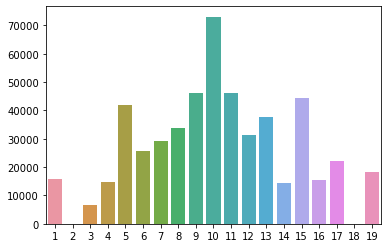

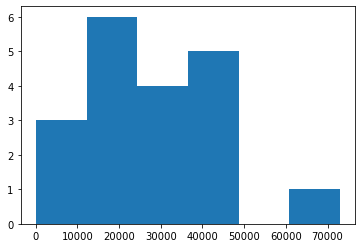

In [80]:
y = merged['Change']
date = merged['Date']
# plt.bar(x=date,height=y)

for x in y:
    if -4.5 <= x <= -4:
        print(hi)
    if 3.5 <= x <= 4:
        print(hi)
#     if -5 <= x <= -4.5:
#         print("between-5and-4.5")       
#     if 4 <= x <= 4.5:
#         print("between4and4.5")     
print(y.max())
print(y.min())
print(y.mean())
bins = np.arange(start=-5, stop=5, step = 0.5)
# bins = np.array([-1,1])
print(bins)
ybin = np.digitize(y, bins, right=True)
print(ybin)
uniq, counts = np.unique(ybin, return_counts=True)
np.set_printoptions(threshold=sys.maxsize)
print(uniq)
uniq = np.insert(uniq,1,2)
uniq = np.insert(uniq,17,18)
print(uniq)
print(counts)
counts = np.insert(counts,1,0)
counts = np.insert(counts,17,0)
print(counts)
np.set_printoptions(threshold = False)
# uniq.insert(1,2)
# uniq.insert(-2,18)
print(ybin.min())
print(ybin.max())
print(len(bins))
print(len(np.unique(ybin)))
print(len(counts))
sns.barplot(x=uniq,y=counts)
plt.show()
plt.hist(counts, bins='auto')
plt.show()

In [81]:
#Selecting the data and splitting into train and test
y = merged['Change']
print(type(y))
# X = df3
# X = df2
# X = df2array
X = processed_tweets
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(X, ybin, test_size=0.2, random_state=0)

# train_holdout_data.to_csv('train_holdout_data.csv', index=False)
# x_holdout.to_csv('x_holdout.csv', index=False)
# y_holdout.to_csv('y_holdout.csv', index=False)
# train_data.to_csv('train_data.csv', index=False)
# x_train.to_csv('x_train.csv', index=False)
# y_train.to_csv('y_train.csv', index=False)
# # x_test.to_csv('x_test.csv', index=False)
# y_test.to_csv('y_test.csv', index=False)

# # train_holdout_data = pd.read_csv('train_holdout_data.csv')
# # x_holdout = pd.read_csv('x_holdout.csv')
# # y_holdout = pd.read_csv('y_holdout.csv')
# # x_train = pd.read_csv('x_train.csv')
# y_train = pd.read_csv('y_train.csv')
# # x_test = pd.read_csv('x_test.csv')
# y_test = pd.read_csv('y_test.csv')

<class 'pandas.core.series.Series'>


In [85]:
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(
               input="array",
               norm="l2",
               max_features=None,
               sublinear_tf=True,
               stop_words="english")),
          ("clf", SGDClassifier(
               loss="log",
               penalty="l2",
               class_weight="balanced",
               tol=0.001))])

pipe.fit(x_train, y_train)

pred_test = pipe.predict(x_test)
pred_train = pipe.predict(x_train)
print("test accuracy", str(np.mean(pred_test == y_test)))
print(metrics.classification_report(y_test, pred_test))

test accuracy 0.2135322497993754
              precision    recall  f1-score   support

           1       0.26      0.26      0.26      3164
           5       0.08      0.33      0.13      1339
           7       0.20      0.26      0.23      3000
           9       0.13      0.27      0.18      2807
          10       0.20      0.16      0.18      2510
          11       0.26      0.20      0.23      2998
          12       0.11      0.27      0.16      1145
          13       0.26      0.36      0.30      3985
          14       0.34      0.62      0.44      3335
          15       0.51      0.20      0.29      2630
          17       0.22      0.14      0.17      3856
          18       0.17      0.21      0.19      2828
          20       0.36      0.20      0.25      8022
          21       0.11      0.32      0.17      1277
          22       0.25      0.17      0.20      8248
          23       0.28      0.19      0.23      6288
          24       0.10      0.28      0.14     

In [6]:
rmse = mean_squared_error(y_test, pred_test, squared = False)
rmse

5.623315320271277

In [87]:
alist = [0.001,0.01,0.05,0.1,0.2,0.5,1,2,3,4.5]
# for a in alist:
#     print("Bin interval:", a)
#     bins = np.arange(start=-4.5, stop=(4.5+a), step = a)
# This process found no highly significant accuracy differences, but overall found 0.2 as optimal at this current stage

bins = np.arange(start=-4.6, stop=(4.2), step = 0.2)
y = merged['Change']
# bins = np.array([-1,1])
ybin = np.digitize(y, bins)
X = all_tweets
x_train, x_test, y_train, y_test = train_test_split(X, ybin, test_size=0.2, random_state=0)


#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(
               input="array",
               norm="l2",
               max_features=None,
               sublinear_tf=True,
               stop_words="english")),
          ("clf", MultinomialNB())])


pipe.fit(x_train, y_train)  
#Predict y value for test dataset
y_predict = pipe.predict(x_test)
y_prob = pipe.predict_proba(x_train)[:,1]
print(classification_report(y_test,y_predict))
print()
# print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# print('AUC:', roc_auc)

              precision    recall  f1-score   support

           1       0.73      0.15      0.25      3164
           5       0.83      0.05      0.09      1339
           7       0.72      0.08      0.14      3000
           9       0.73      0.08      0.15      2807
          10       0.82      0.07      0.13      2510
          11       0.77      0.13      0.23      2998
          12       0.85      0.02      0.04      1145
          13       0.67      0.29      0.41      3985
          14       0.67      0.42      0.51      3335
          15       0.78      0.18      0.29      2630
          17       0.71      0.13      0.22      3856
          18       0.80      0.07      0.13      2828
          20       0.35      0.45      0.39      8022
          21       0.97      0.03      0.05      1277
          22       0.21      0.50      0.29      8248
          23       0.54      0.30      0.38      6288
          24       0.91      0.01      0.02      1157
          26       0.17    

In [15]:
y_train1 = y_train.astype(np.float32)
y_test1 = y_test.astype(np.float32)
# x_train1 = x_train.scipy.sparse.csr_matrix.astype(dtype = np.float32)
# x_test1 = x_test.scipy.sparse.csr_matrix.astype(dtype = np.float32)

AttributeError: 'list' object has no attribute 'scipy'

In [19]:
in_dimension = 413704
hid_dimension = 3
out_dimension = 1

class PoleNN(nn.Module):
    def __init__(self):
        super(PoleNN, self).__init__()
        self.fc1 = nn.Linear(in_dimension,hid_dimension)
        self.fc2 = nn.Linear(hid_dimension,out_dimension)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, X):
        hidden = self.fc1(X)
        hidden = self.sigmoid(hidden)
        output = self.fc2(hidden)
        return output

from skorch import NeuralNetRegressor
from sklearn.pipeline import Pipeline

pole_model = PoleNN()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(pole_model.parameters(), lr = 0.1)

net = NeuralNetBinaryClassifier(module=PoleNN, max_epochs=10, lr=0.1)

# pipe = Pipeline([('transform', DataFrameTransformer()),('net', net)])
# pipe = Pipeline([('net', net)])


pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english")), ("set_type", astype(dtype = np.float32)), ("net", net)])


pipe.fit(x_train, y_train1)  
#Predict y value for test dataset
y_predict = pipe.predict(x_test)
y_prob = pipe.predict_proba(x_train)[:,1]
print(classification_report(y_test1,y_predict))
# print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)
# print('AUC:', roc_auc)

TypeError: astype() missing 1 required positional argument: 'x'

In [ ]:
from sklearn.svm import LinearSVR, SVR

x_trainsvm = x_train
y_trainsvm = y_train
x_testsvm = x_test

y_trainsvm = np.array(y_train).ravel()
y_testsvm = np.array(y_test).ravel()
#Create the SVM model

start = time.time()
# regressor = LinearSVR(random_state = 0)
regressor = SVR()
#Fit the model for the data
pipe = Pipeline([("tfidf_vector_com", TfidfVectorizer(input="array", norm="l2", max_features=None, sublinear_tf=True, stop_words="english")), ("regressor", regressor)])
pipe.fit(x_trainsvm, y_trainsvm)

#Make the prediction
y_predsvm = regressor.predict(x_testsvm)






accuracies = cross_val_score(estimator = regressor, X = x_trainsvm, y = y_trainsvm, cv = 10)
end = time.time()
# print("Fraction: ", x)
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
mse = mean_squared_error(y_test,y_predsvm)
print("Mean Squared Error: {}".format(mse))
r2 = r2_score(y_test,y_predsvm)
print("R-squared: {}".format(r2))
print("")
print("Elapsed Time: ", (end-start),"\n")